# 4주차 세션 (9/14)
### 2조 실습: 특성 공학과 규제


# 예시 1) 캘리포니아 주택 가격

|순번|변수|설명|
|---|---|---|
|1|longitude|경도|
|2|latitude|위도|
|3|housing_median_age|주택 나이 (중앙값)|
|4|total_rooms|전체 방 수|
|5|total_bedrooms|전체 침실 수|
|6|population|인구|
|7|households|세대|
|8|median_income|소득(중앙값)|
|9|median_house_value|주택 가치(중앙값)|
|10|ocean_proximity|바다 근접도|

##데이터 전처리

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


sns.set_style('whitegrid')

In [2]:
# housing 자료 불러오기
from google.colab import files
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b'longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity\n-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY\n-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY\n-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY\n-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY\n-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY\n-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY\n-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY\n-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY\n-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY\n-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY\n-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY\n-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY\n-

In [3]:
# 문제 1. df 불러오기
# df = 
df = pd.read_csv("housing.csv")

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# 문제 2. df에서 ocean_proximity 변수 원핫인코딩하고, ocean_proximity 변수 제거 (힌트 : pd.get_dummies, pd.concat, drop)
ocean_proximity = pd.get_dummies(df["ocean_proximity"])
df.drop("ocean_proximity", inplace = True, axis = 1)
df = pd.concat([df, ocean_proximity], axis = 1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [5]:
# 문제 3. df에서 결측치 확인후 제거하기(힌트: dropna)
df.dropna(axis = 0, inplace = True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [6]:
#y를 median_house_value로 지정, X는 나머지 변수로 지정
feature_list = df.columns.difference(["median_house_value"])

X = df[feature_list]
y = df["median_house_value"]

##Train-test split

In [7]:
from sklearn.model_selection import train_test_split

# random_state = 42로 train-test set 나누기
# 문제 4. train_input, test_input, train_target, test_target = 

train_input, test_input, train_target, test_target = train_test_split(X, y, random_state = 42)
print(train_input.shape,test_input.shape)

(15324, 13) (5109, 13)


In [8]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

##Polynomial

In [9]:
# 문제 5. poly라는 객체로 PolynomialFeatures() 생성하기 (이때 bias는 포함하지 않기, degree는 2로 설정)
# poly = 
poly = PolynomialFeatures(degree=2,include_bias = False)


In [10]:
# 문제 6. train_input을 train_poly, test_input을 test_poly로 변환하기(힌트:24pg)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)
print(test_poly.shape)

(15324, 104)
(5109, 104)


In [11]:
# 문제 7. 104개의 특성이 어떤 조합으로 만들어졌는지 확인해보기(힌트: get_feature_names())
print(poly.get_feature_names())

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


## Linear Regression (선형 회귀)

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

In [12]:
# lin_model = 

lin_model = LinearRegression()

In [13]:
# 문제 8. lim_model에 train_poly, train_target fit 시키기
lin_model.fit(train_poly,train_target)

LinearRegression()

In [14]:
# 문제 9. lin_model로 train_poly에 대한 R^2값 구하기 (train_score 변수에 대입)
# train_score = 
train_score = lin_model.score(train_poly, train_target)

# 문제 10. lin_model로 test_poly에 대한 R^2값 구하기 (test_score 변수에 대입)
# test_score = 
test_score = lin_model.score(test_poly, test_target)

print(f'Train score : {train_score}')
print(f'Test score : {test_score}')

Train score : 0.714114958887667
Test score : -158313.05229289902


## Ridge Regression (릿지 회귀)
### L2 Regularization


\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

In [15]:
#train_poly와 test_poly를 정규화 하여 train_scaled와 test_scaled로 만들어주기
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

In [16]:
#문제 11. 릿지 회귀 훈련하기 (힌트: train_scaled,test_scaled 이용 )
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(train_scaled, train_target)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(test_scaled,test_target)))

훈련 세트의 정확도 : 0.70
테스트 세트의 정확도 : 0.70


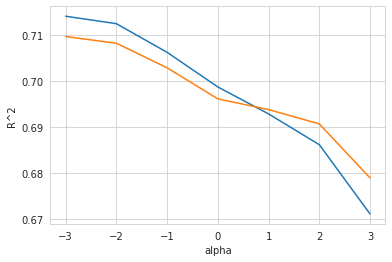

In [17]:
# 문제 12. 최적의 alpha값 찾기 

import matplotlib.pyplot as plt
train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100,1000]
for alpha in alpha_list:
    #릿지 모델
    ridge=Ridge(alpha=alpha)
    #훈련
    ridge.fit(train_scaled,train_target)
    #훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))


plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()



In [18]:
# 문제 13. RidgeCV를 이용하여 최적의 alpha값 찾아내기 
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score

alpha_list=[0.001,0.01,0.1,1,10,100,1000]
# RidgeCV는 alpha로 넣고자 하는 값들을 리스트로 전달하면 내부적으로 최적의 alpha값을 찾아냄
ridgecv = RidgeCV(alphas=alpha_list, normalize=True, cv=5)
# cv : cross-validation -> 데이터를 k등분한 후 각각에 대하여 검증 진행
# 검증 결과 가장 점수가 높은 모델을 채택
ridgecv.fit(train_scaled,train_target)
y_pred = ridgecv.predict(test_scaled)

mae = mean_absolute_error(test_target, y_pred)
r2 = r2_score(test_target, y_pred)
print(f'Test MAE: {mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')
print(f'alpha: {ridgecv.alpha_}') # 최종 결정된 alpha값

Test MAE: 48,048
R2 Score: 0.6738

alpha: 0.1


## Lasso Regression (라쏘 회귀)
### L1 Regularization

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}



In [19]:
# 문제 14. 랏소 회귀 훈련하기 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(train_scaled, train_target)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(test_scaled,test_target)))

훈련 세트의 정확도 : 0.69
테스트 세트의 정확도 : 0.69


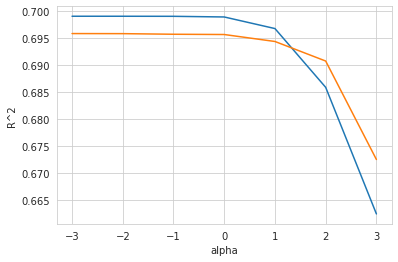

In [20]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
# 문제 15. 최적의 alpha값 찾기 

train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100,1000]
for alpha in alpha_list:
    #라쏘 모델
    lasso=Lasso(alpha=alpha,max_iter=10000)
    #훈련
    lasso.fit(train_scaled,train_target)
    #훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [21]:
# 문제 16. LassoCV를 이용하여 최적의 alpha값 찾아내기 
from sklearn.metrics import mean_absolute_error, r2_score

alpha_list=[0.001,0.01,0.1,1,10,100,1000]

# LassoCV는 alpha로 넣고자 하는 값들을 리스트로 전달하면 내부적으로 최적의 alpha값을 찾아냄
lassocv = LassoCV(alphas=alpha_list, normalize=True, cv=5)
# cv : cross-validation -> 데이터를 k등분한 후 각각에 대하여 검증 진행
# 검증 결과 가장 점수가 높은 모델을 채택
lassocv.fit(train_scaled, train_target)
y_pred = lassocv.predict(test_scaled)

mae = mean_absolute_error(test_target, y_pred)
r2 = r2_score(test_target, y_pred)

print(f'Test MAE: {mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')
print(f'alpha: {lassocv.alpha_}') # 최종 결정된 alpha값

Test MAE: 48,480
R2 Score: 0.6681

alpha: 10.0


## Elastic-Net (신축망)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

+ $\alpha$: 규제의 강도를 조절하는 매개변수
+ $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

In [22]:
# 문제 17. 엘라스틱 회귀 훈련하기 
from sklearn.linear_model import ElasticNet
elasticNet=ElasticNet()
elasticNet.fit(train_scaled, train_target)
print("훈련 세트의 정확도 : {:.2f}".format(elasticNet.score(train_scaled, train_target)))
print("테스트 세트의 정확도 : {:.2f}".format(elasticNet.score(test_scaled,test_target)))

훈련 세트의 정확도 : 0.64
테스트 세트의 정확도 : 0.65


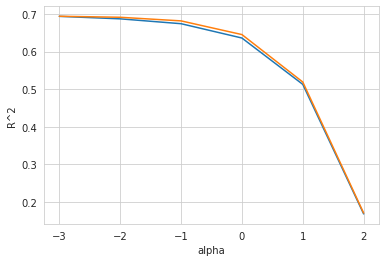

In [23]:
# 문제 18.최적의 alpha값 찾기 
from sklearn.linear_model import ElasticNetCV

train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    #엘라스틱 모델
    elasticNet=ElasticNet(alpha=alpha,max_iter=10000)
    #훈련
    elasticNet.fit(train_scaled,train_target)
    #훈련 점수와 테스트 점수 저장
    train_score.append(elasticNet.score(train_scaled,train_target))
    test_score.append(elasticNet.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [24]:
# 문제 19. elasticNetCV를 이용하여 최적의 alpha값 찾아내기 

alpha_list=[0.001,0.01,0.1,1,10,100]

# elasticNetCV는 alpha로 넣고자 하는 값들을 리스트로 전달하면 내부적으로 최적의 alpha값을 찾아냄
elasticNetCV = ElasticNetCV(alphas=alpha_list, normalize=True, cv=5)
# cv : cross-validation -> 데이터를 k등분한 후 각각에 대하여 검증 진행
# 검증 결과 가장 점수가 높은 모델을 채택
elasticNetCV.fit(train_scaled, train_target)
y_pred = elasticNetCV.predict(test_scaled)

mae = mean_absolute_error(test_target, y_pred)
r2 = r2_score(test_target, y_pred)
print(f'Test MAE: {mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

print(f'alpha: {elasticNetCV.alpha_}') # 최종 결정된 alpha값

Test MAE: 65,784
R2 Score: 0.4643

alpha: 0.001


# 예시 2) 보스턴 주택 가격 데이터

: 1978년에 발표된 데이터로 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 정리함


|순번|변수|설명|
|---|---|---|
|1|CRIM|자치시(town) 별 1인당 범죄율|
|2|ZN| 25,000 평방피트를 초과하는 거주지역의 비율
|3|INDUS|비소매상업지역이 점유하고 있는 토지의 비율
|4|CHAS|찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
|5|NOX|10ppm 당 농축 일산화질소
|6|RM|주택 1가구당 평균 방의 개수
|7|AGE|1940년 이전에 건축된 소유주택의 비율
|8|DIS|5개의 보스턴 직업센터까지의 접근성 지수
|9|RAD|방사형 도로까지의 접근성 지수
|10|TAX|10,000 달러 당 재산세율
|11|PTRATIO|자치시(town)별 학생/교사 비율
|12|B|1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
|13|LSTAT|모집단의 하위계층의 비율(%)
|14|MEDV|본인 소유의 주택가격(중앙값) (단위: $1,000)


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [26]:
#보스턴 집 값 데이터 불러오기
df = pd.DataFrame(data = load_boston().data, columns = load_boston().feature_names)
df["Price"] = load_boston().target

In [27]:
# 문제 1. train_test 분리 (test_size=0.3, random_state=10으로 설정)
feature_list = df.columns.difference(['Price'])
X = df[feature_list]
y = df["Price"]
train_input, test_input, train_target, test_target = train_test_split(X, y,  test_size=0.3, random_state=10)

In [28]:
# 문제 2. train_input test_input를 정규화 하여 train_scaled와 test_scaled로 만들어주기
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [29]:
coeff_df=pd.DataFrame()
alphas=[0,1,10,100,1000]
for pos, alpha in enumerate(alphas):
 # 문제 3. 정의된 alpha에 대해 ridge 회귀 훈련 시키기
    ridge=Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    
    coeff=pd.Series(data=ridge.coef_,index=train_input.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff

In [30]:
ridge_alphas=[0,1,10,100,1000]
sort_column='alpha:'+ str(ridge_alphas[0])

#문제4: coeff_df를 sort_column을 기준으로 내림차순으로 배열하기 (힌트: sort_values 이용, by=sort_column)
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0,alpha:1,alpha:10,alpha:100,alpha:1000
RAD,2.694710,2.596740,1.961788,0.500603,-0.215483
RM,2.237839,2.253852,2.360393,2.408390,1.100750
ZN,1.561502,1.536440,1.357074,0.802739,0.429389
B,1.223567,1.221851,1.205022,0.998920,0.419217
CHAS,0.374494,0.379272,0.411117,0.488762,0.278239
AGE,0.316807,0.303516,0.207480,-0.109272,-0.307676
INDUS,-0.168610,-0.189502,-0.310426,-0.471588,-0.449522
CRIM,-1.252809,-1.238197,-1.133997,-0.776693,-0.396810
PTRATIO,-1.746892,-1.737953,-1.672819,-1.388833,-0.688087
NOX,-1.777633,-1.740641,-1.471097,-0.653699,-0.364843


In [31]:
# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(train_scaled, train_target)
ridge_df = pd.DataFrame({'variable': np.array(X.columns), 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

In [32]:
for alpha in np.arange(0, 200, 1):
  # 문제 5. alpha값을 변화시키면서, 릿지 훈련
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(train_scaled, train_target)

    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    ridge_train_pred.append(ridge_reg.predict(train_scaled))
    ridge_test_pred.append(ridge_reg.predict(test_scaled))


In [33]:
# organize dataframe
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, axis=1).reset_index()

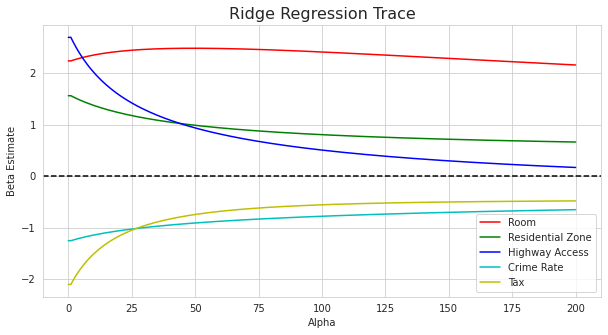

In [34]:
# 문제 6. 알파값에 따른 베타값 그래프(Room, Residential Zone, Highway Access, Crime Rate, Tax 변수에 대해 알아보기)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Alpha")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)